
# Plant Disease Classification Using CNN

This project implements a Convolutional Neural Network (CNN) to classify plant leaf images into three categories: **Healthy**, **Powdery mildew**, and **Rust**. The dataset is organized into training, validation, and testing folders and stored on Google Drive. The model is trained using TensorFlow and Keras on Google Colab.

---

## Project Overview

This project trains a CNN model to detect common plant leaf diseases from images. It uses image augmentation for training and evaluates performance on a separate validation and test set. The model is saved and can be loaded for prediction on new images.

---

##  Key Features

- Loads training, validation, and test datasets from Google Drive
- Visualizes sample leaf images
- Applies real-time image augmentation using `ImageDataGenerator`
- Builds a custom CNN architecture
- Trains the model and monitors performance using accuracy/loss plots
- Evaluates performance with:
  - Confusion Matrix
  - Accuracy metrics
- Predicts disease class from single images
- Saves trained model in `.keras` format for reuse

---

## Dataset Structure

The dataset is stored on Google Drive with the following directory structure:

```
plant_dataset/
├── Train/
│   └── Train/
│       ├── Healthy/
│       ├── Powdery/
│       └── Rust/
├── Validation/
│   └── Validation/
│       ├── Healthy/
│       ├── Powdery/
│       └── Rust/
└── Test/
    └── Test/
        ├── Healthy/
        ├── Powdery/
        └── Rust/
```

Each folder contains images of leaves belonging to the respective class.

---

## Environment Setup


- **Language:** Python 3.11
- **Libraries:**
  - Deep Learning: `tensorflow`, `keras`
  - Visualization: `matplotlib`, `seaborn`
  - Data Handling: `numpy`, `os`
  - Evaluation: `sklearn.metrics`
- **Platform:** Google Colab (preferred)

---

## How to Run

1. **Mount Google Drive in Colab**

```python
from google.colab import drive
drive.mount('/content/drive')
```

2. **Set paths** to your dataset folders on Google Drive.

3. **Run the notebook/code** to:
   - Count images per class
   - Display sample images
   - Prepare image data generators
   - Build and train the CNN model
   - Evaluate on validation and test sets
   - Plot training history and confusion matrix
   - Save the trained model
   - Predict on single images

---


## Model Architecture

- Input: 225x225 RGB images
- Conv2D (32 filters, 3x3) + ReLU + MaxPooling
- Conv2D (64 filters, 3x3) + ReLU + MaxPooling
- Flatten
- Dense (64 units, ReLU)
- Output Dense (3 units, Softmax)

---

## Training Details

- Optimizer: Adam
- Loss function: Categorical Crossentropy
- Metrics: Accuracy
- Epochs: 5 (can be increased for better performance)
- Batch size: 32
- Data augmentation applied to training images (rescale, shear, zoom, horizontal flip)

---

## Results and Evaluation

- The model is evaluated on a separate test set.
- Confusion matrix and accuracy/loss plots are generated.
- Sample predictions on test images are printed.
- Final test accuracy is displayed and plotted.

---


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import os
from IPython import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


In [ ]:
# Function to count the number of files in a directory
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Define paths for training data
train_files_healthy = "/content/drive/MyDrive/crop/plant_dataset/Train/Train/Healthy"
train_files_powdery = "/content/drive/MyDrive/crop/plant_dataset/Train/Train/Powdery"
train_files_rust = "/content/drive/MyDrive/crop/plant_dataset/Train/Train/Rust"

# Define paths for test data
test_files_healthy = "/content/drive/MyDrive/crop/plant_dataset/Test/Test/Healthy"
test_files_powdery = "/content/drive/MyDrive/crop/plant_dataset/Test/Test/Powdery"
test_files_rust = "/content/drive/MyDrive/crop/plant_dataset/Test/Test/Rust"

# Print number of Validation images

valid_files_healthy = "/content/drive/MyDrive/crop/plant_dataset/Validation/Validation/Healthy"
valid_files_powdery = "/content/drive/MyDrive/crop/plant_dataset/Validation/Validation/Powdery"
valid_files_rust = "/content/drive/MyDrive/crop/plant_dataset/Validation/Validation/Rust"

# Print number of test images
print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

# Print number of train images
print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

# Print number of validation images
print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


In [ ]:
# Function to display sample images
def show_sample_images(path, num_images=5, image_width=500):
  # List the first 2 image files
  image_files = sorted(os.listdir(folder_path))[:2]

  # Display the images
  for image_file in image_files:
      image_path = os.path.join(folder_path, image_file)
      with open(image_path, 'rb') as f:
          display.display(display.Image(data=f.read(), width=500))

Healthy Plant image:


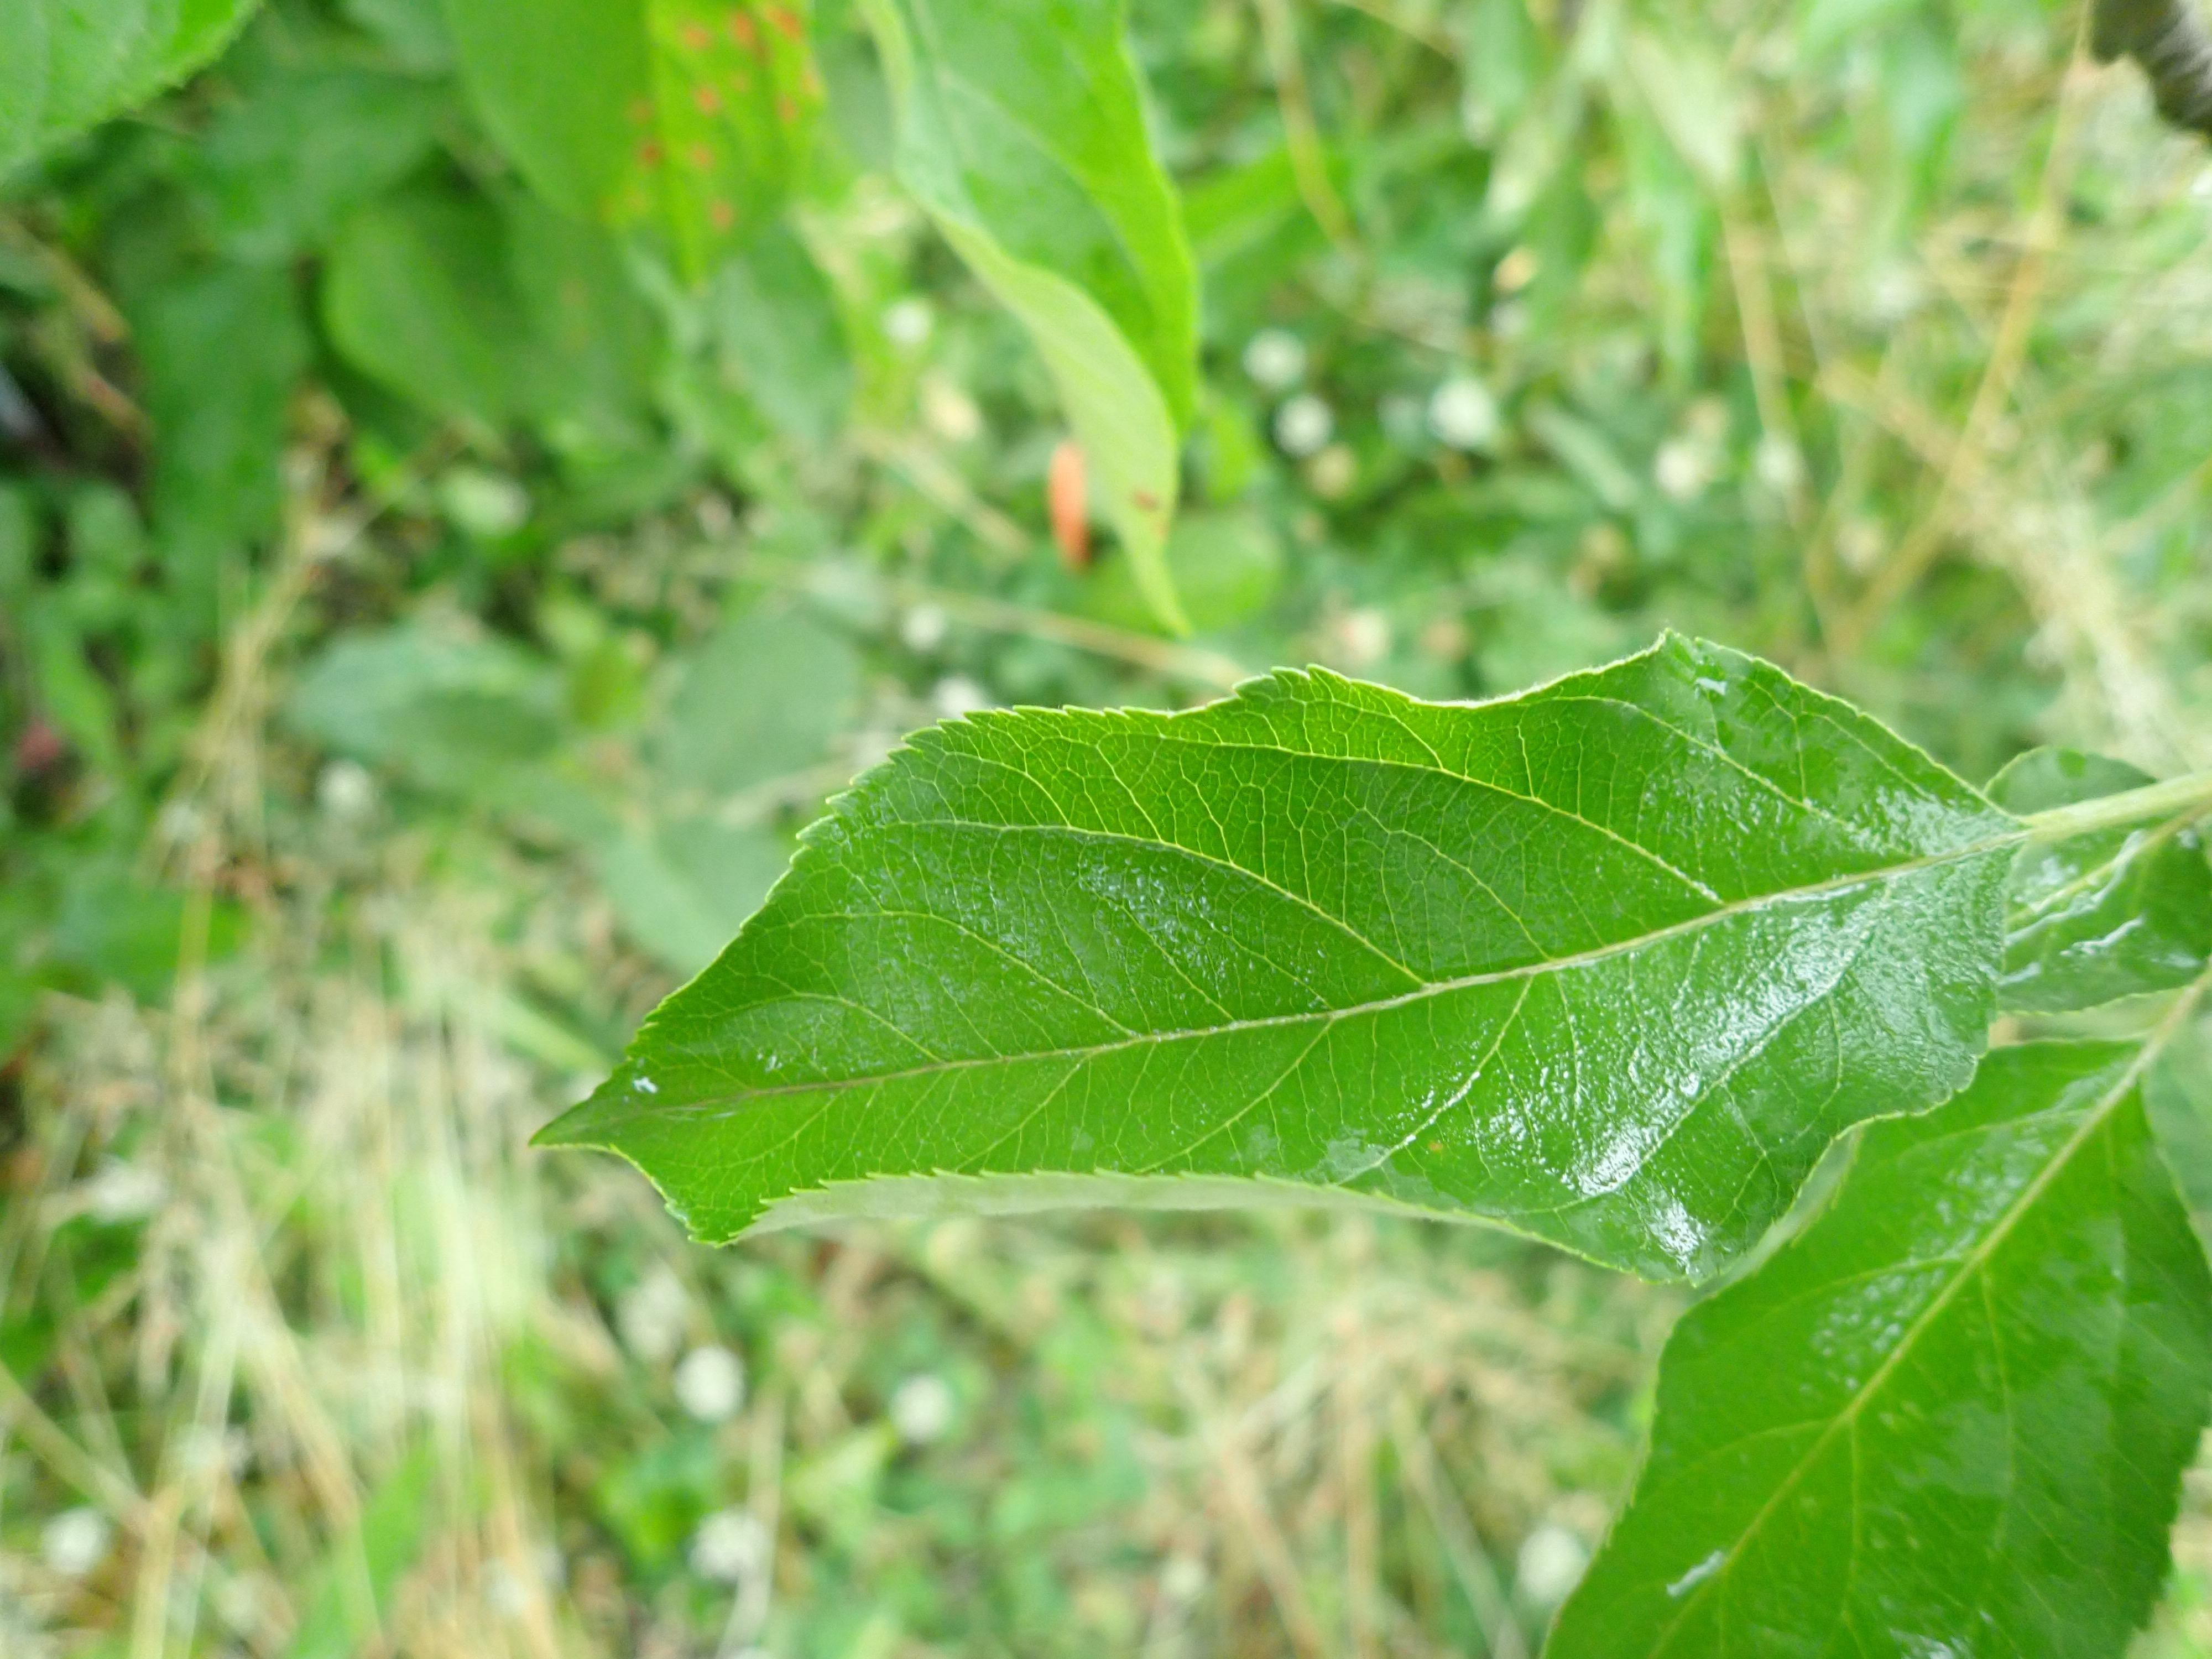

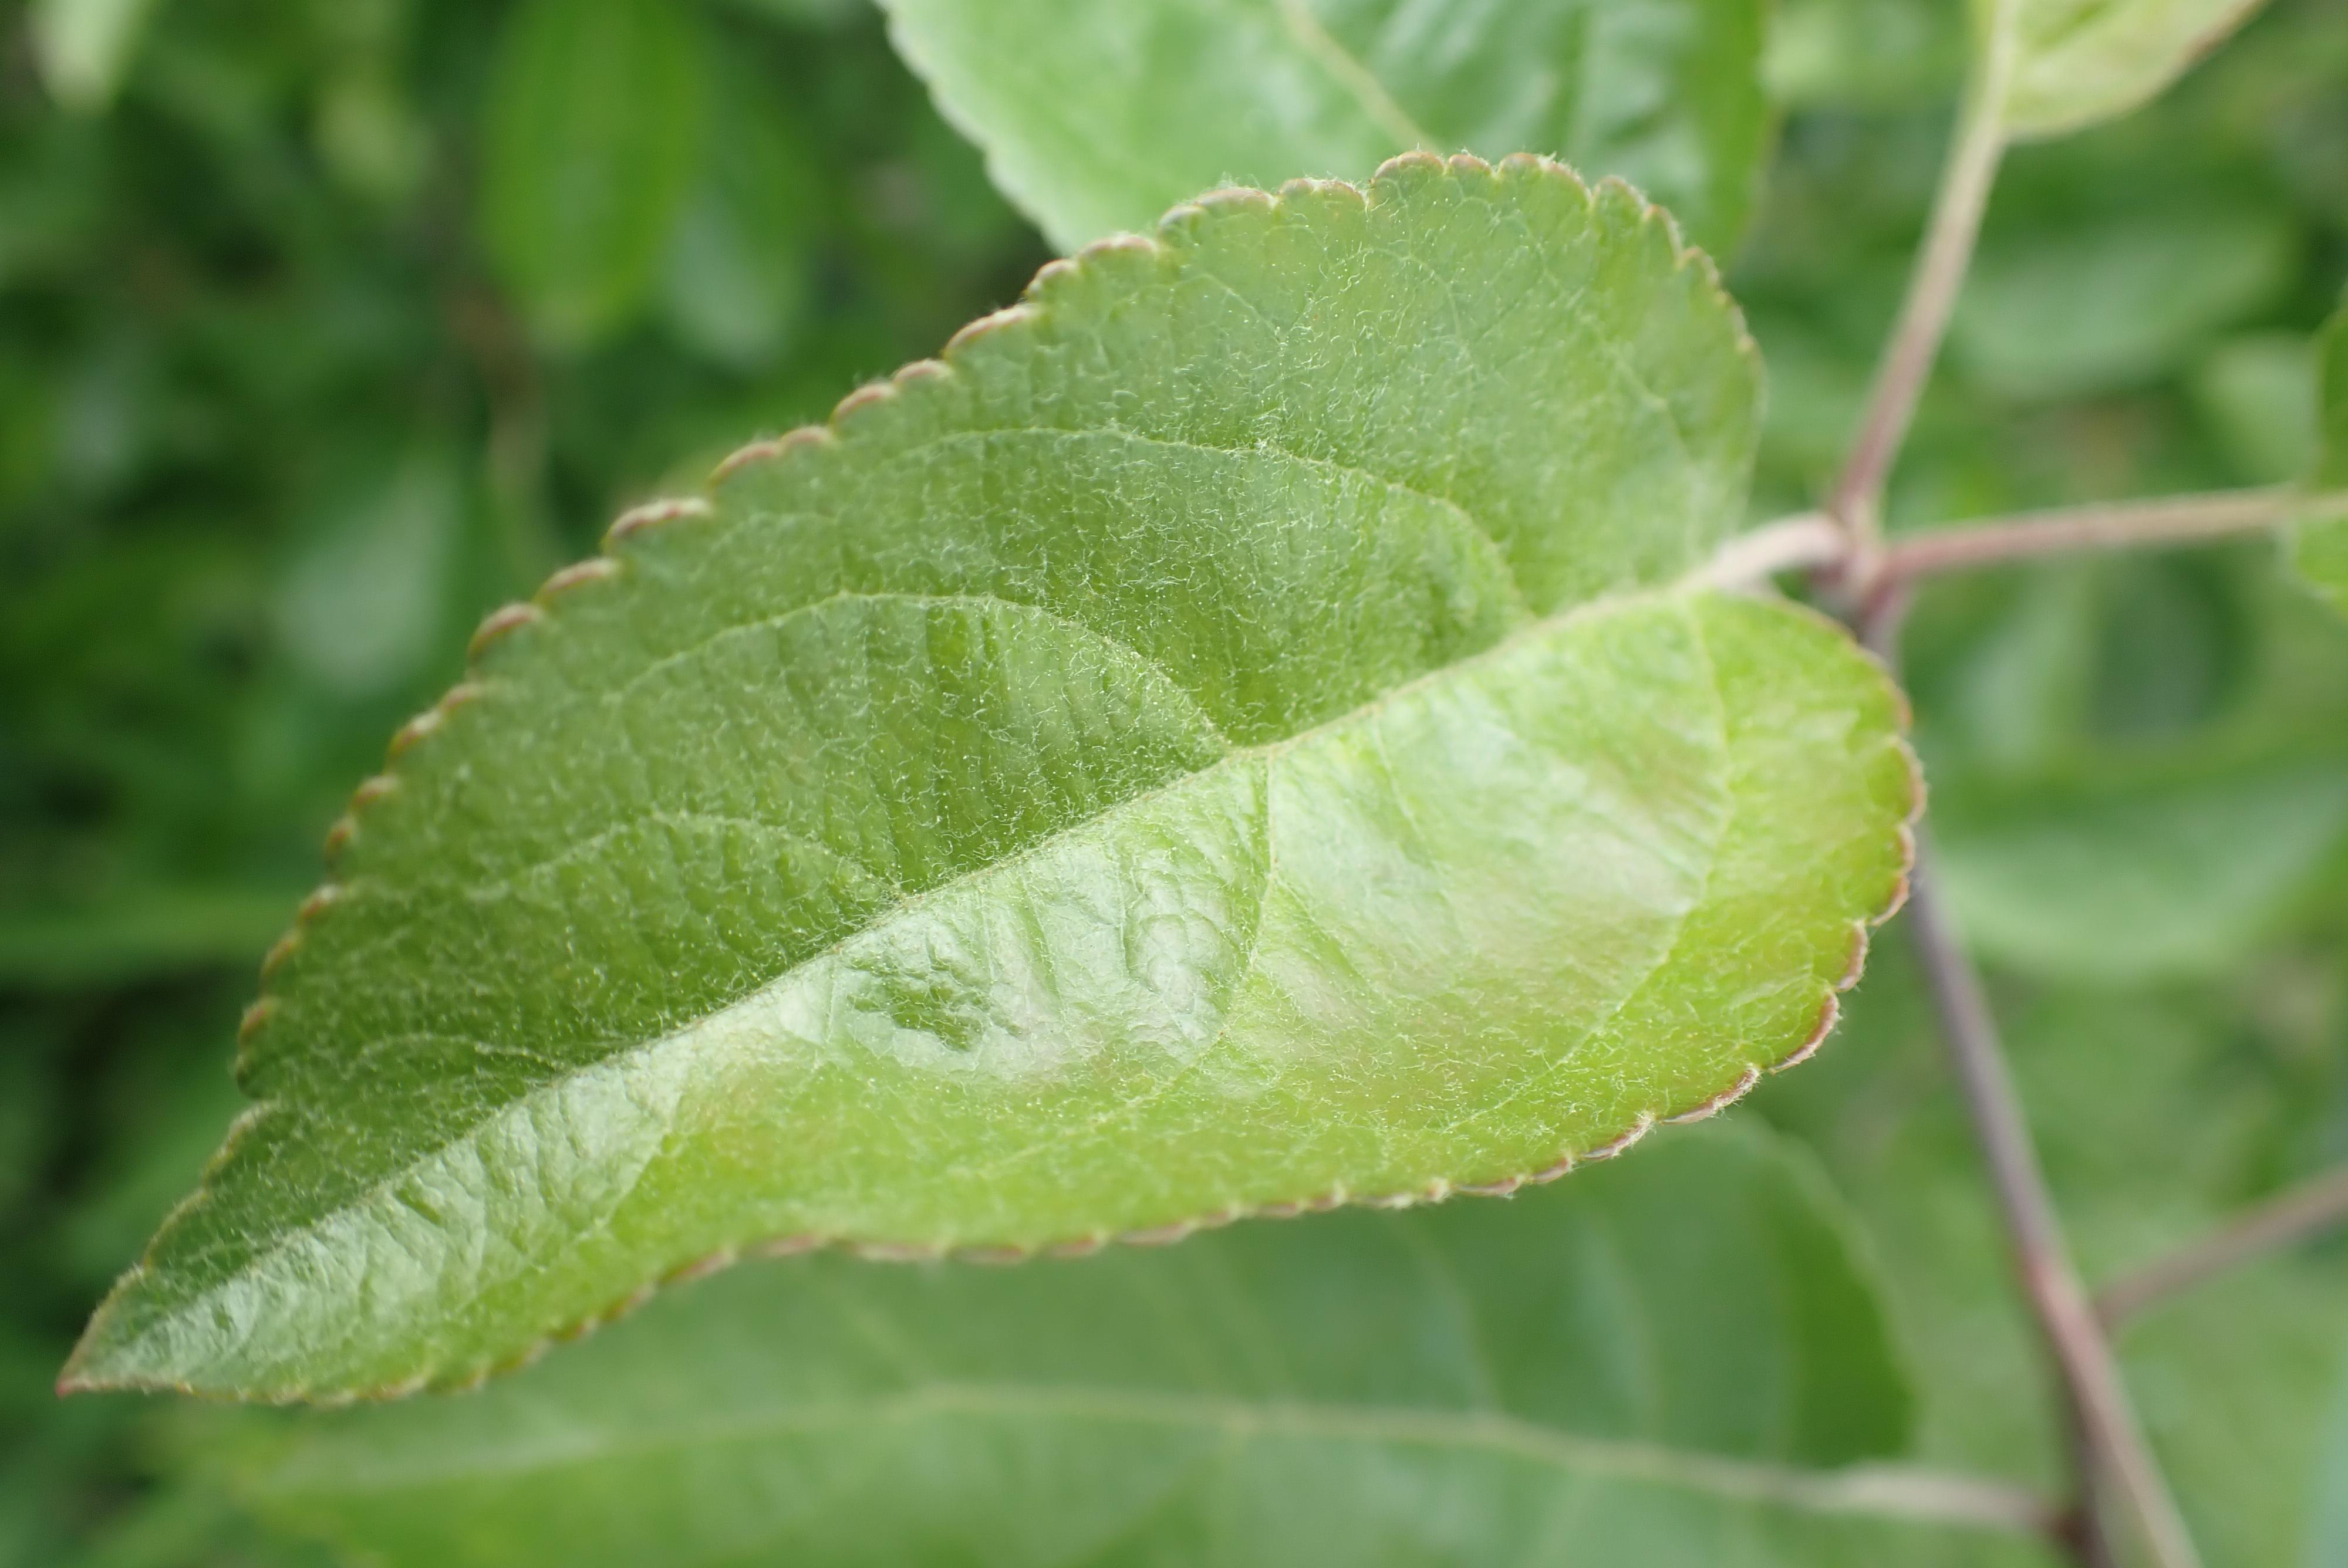

In [ ]:
# Show Healthy plant image samples
folder_path = '/content/drive/MyDrive/crop/plant_dataset/Train/Train/Healthy'
print("Healthy Plant image:")
show_sample_images(folder_path)

Rust Plant image:


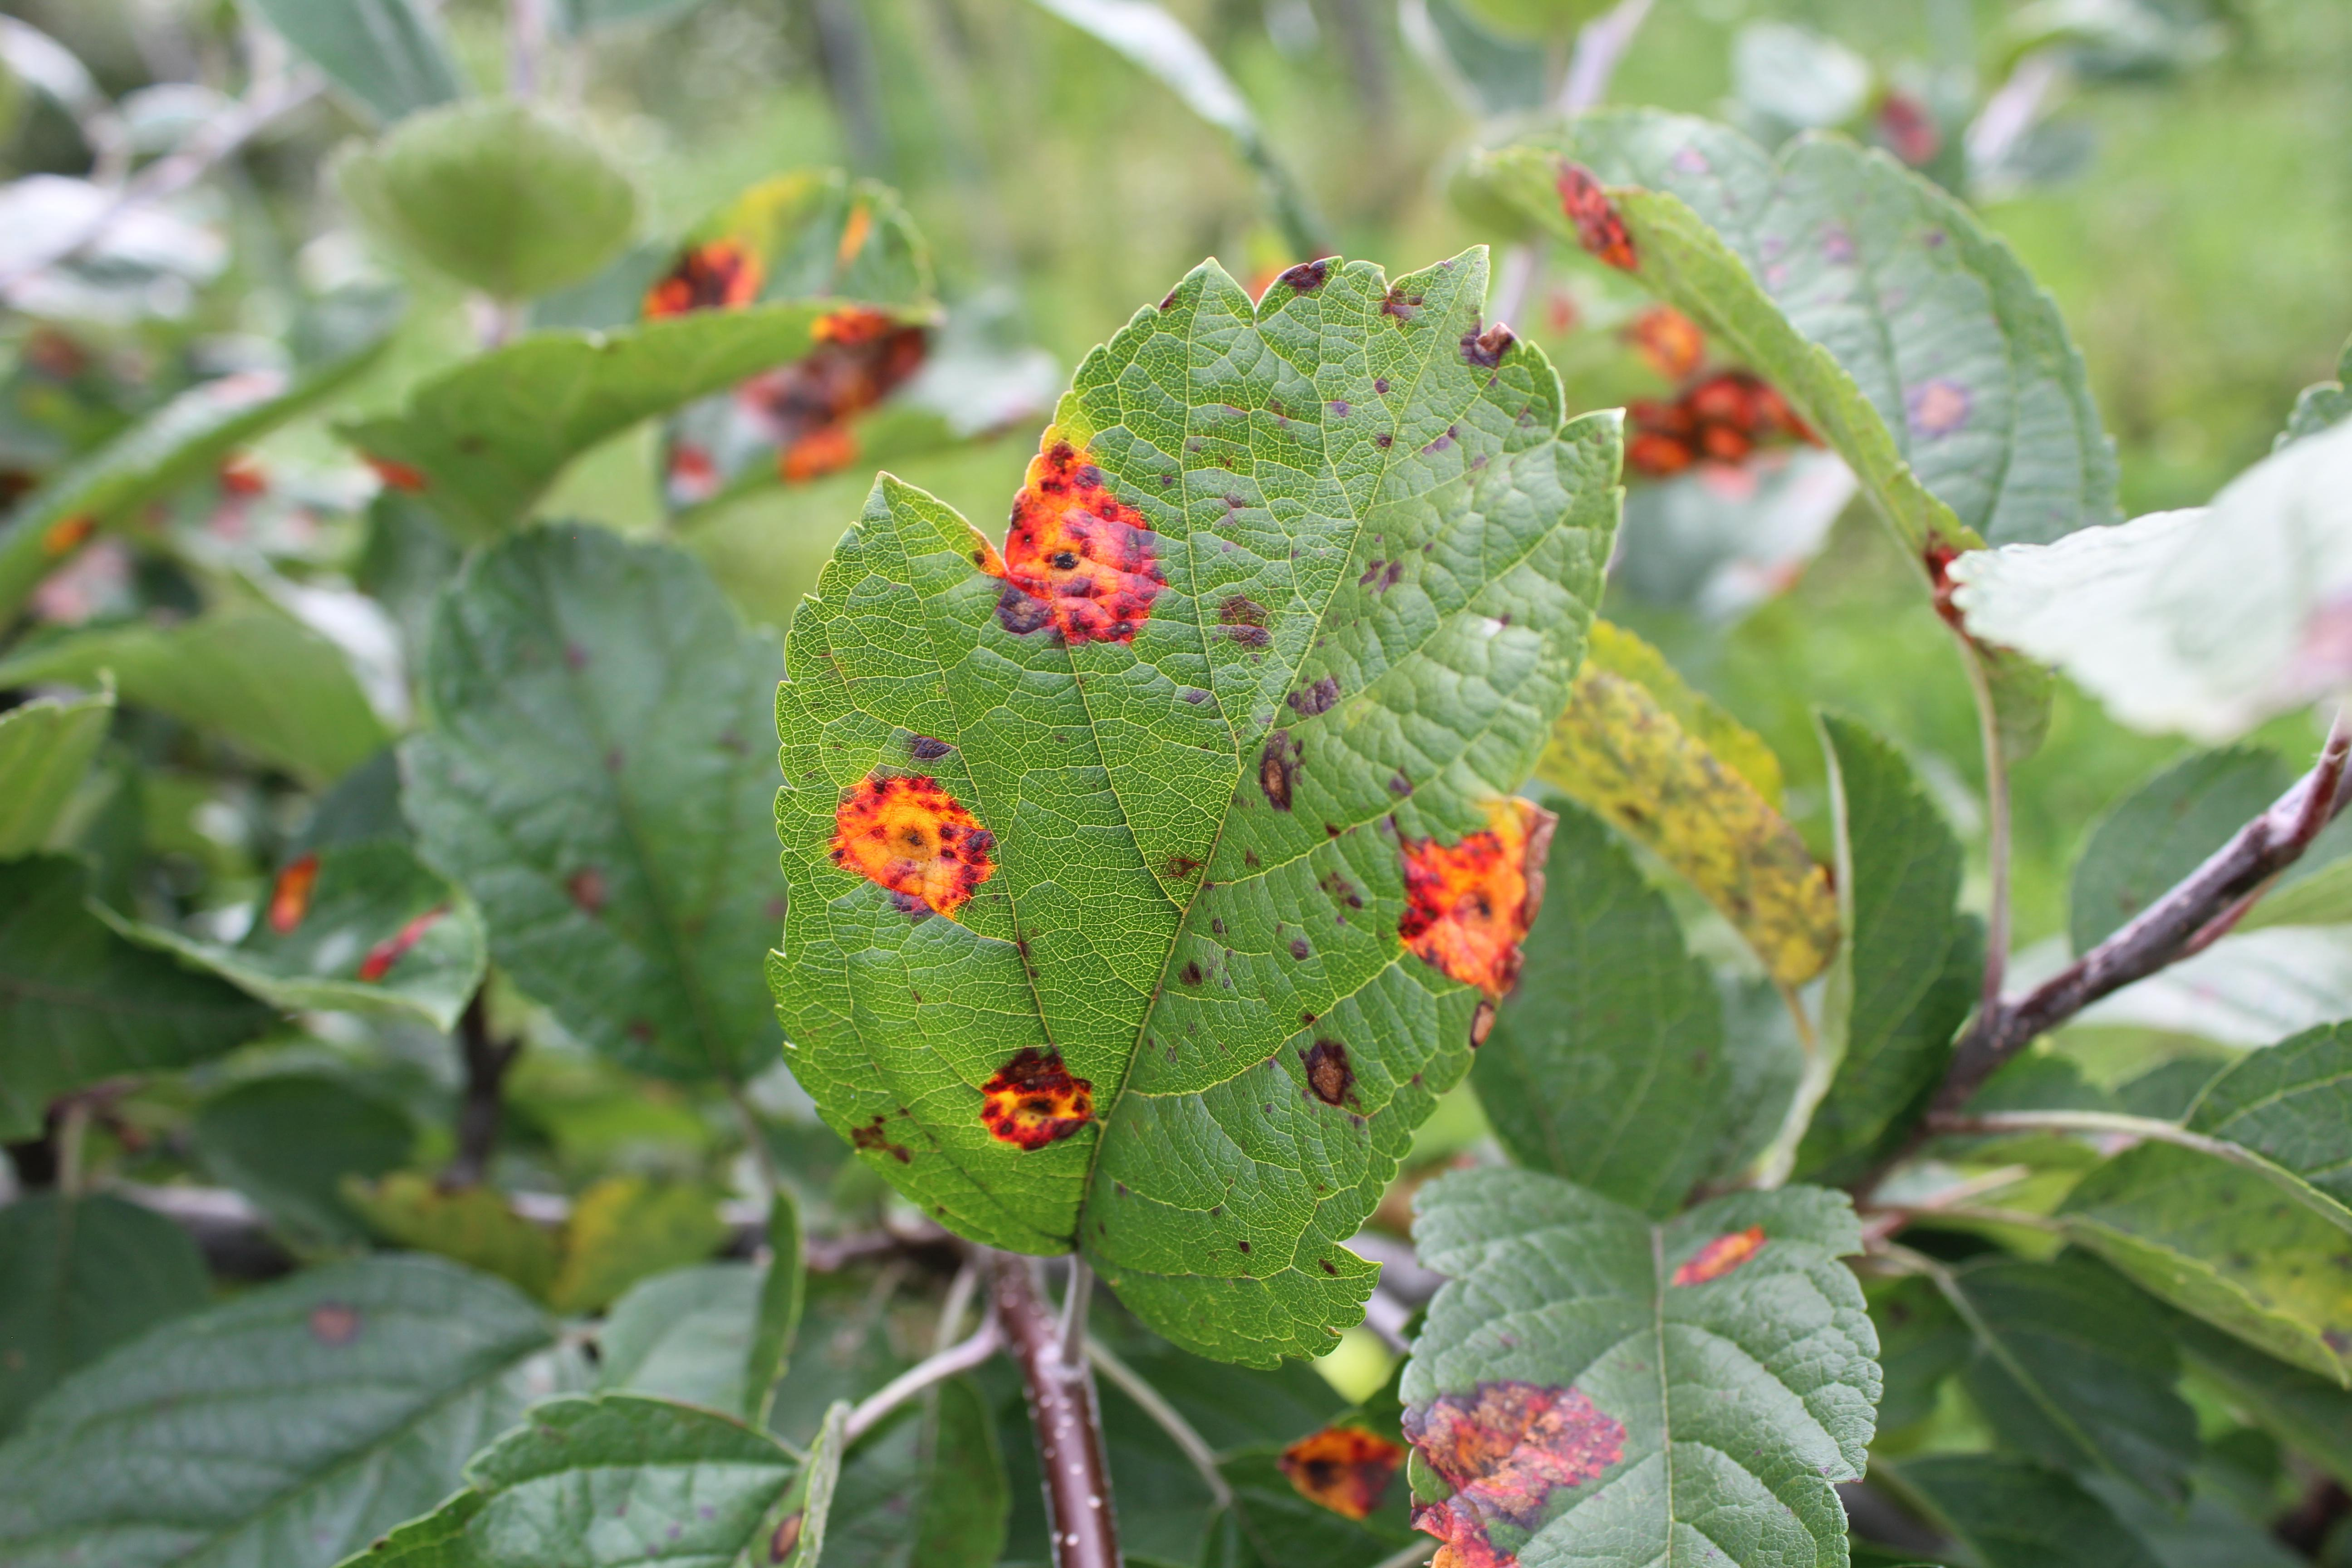

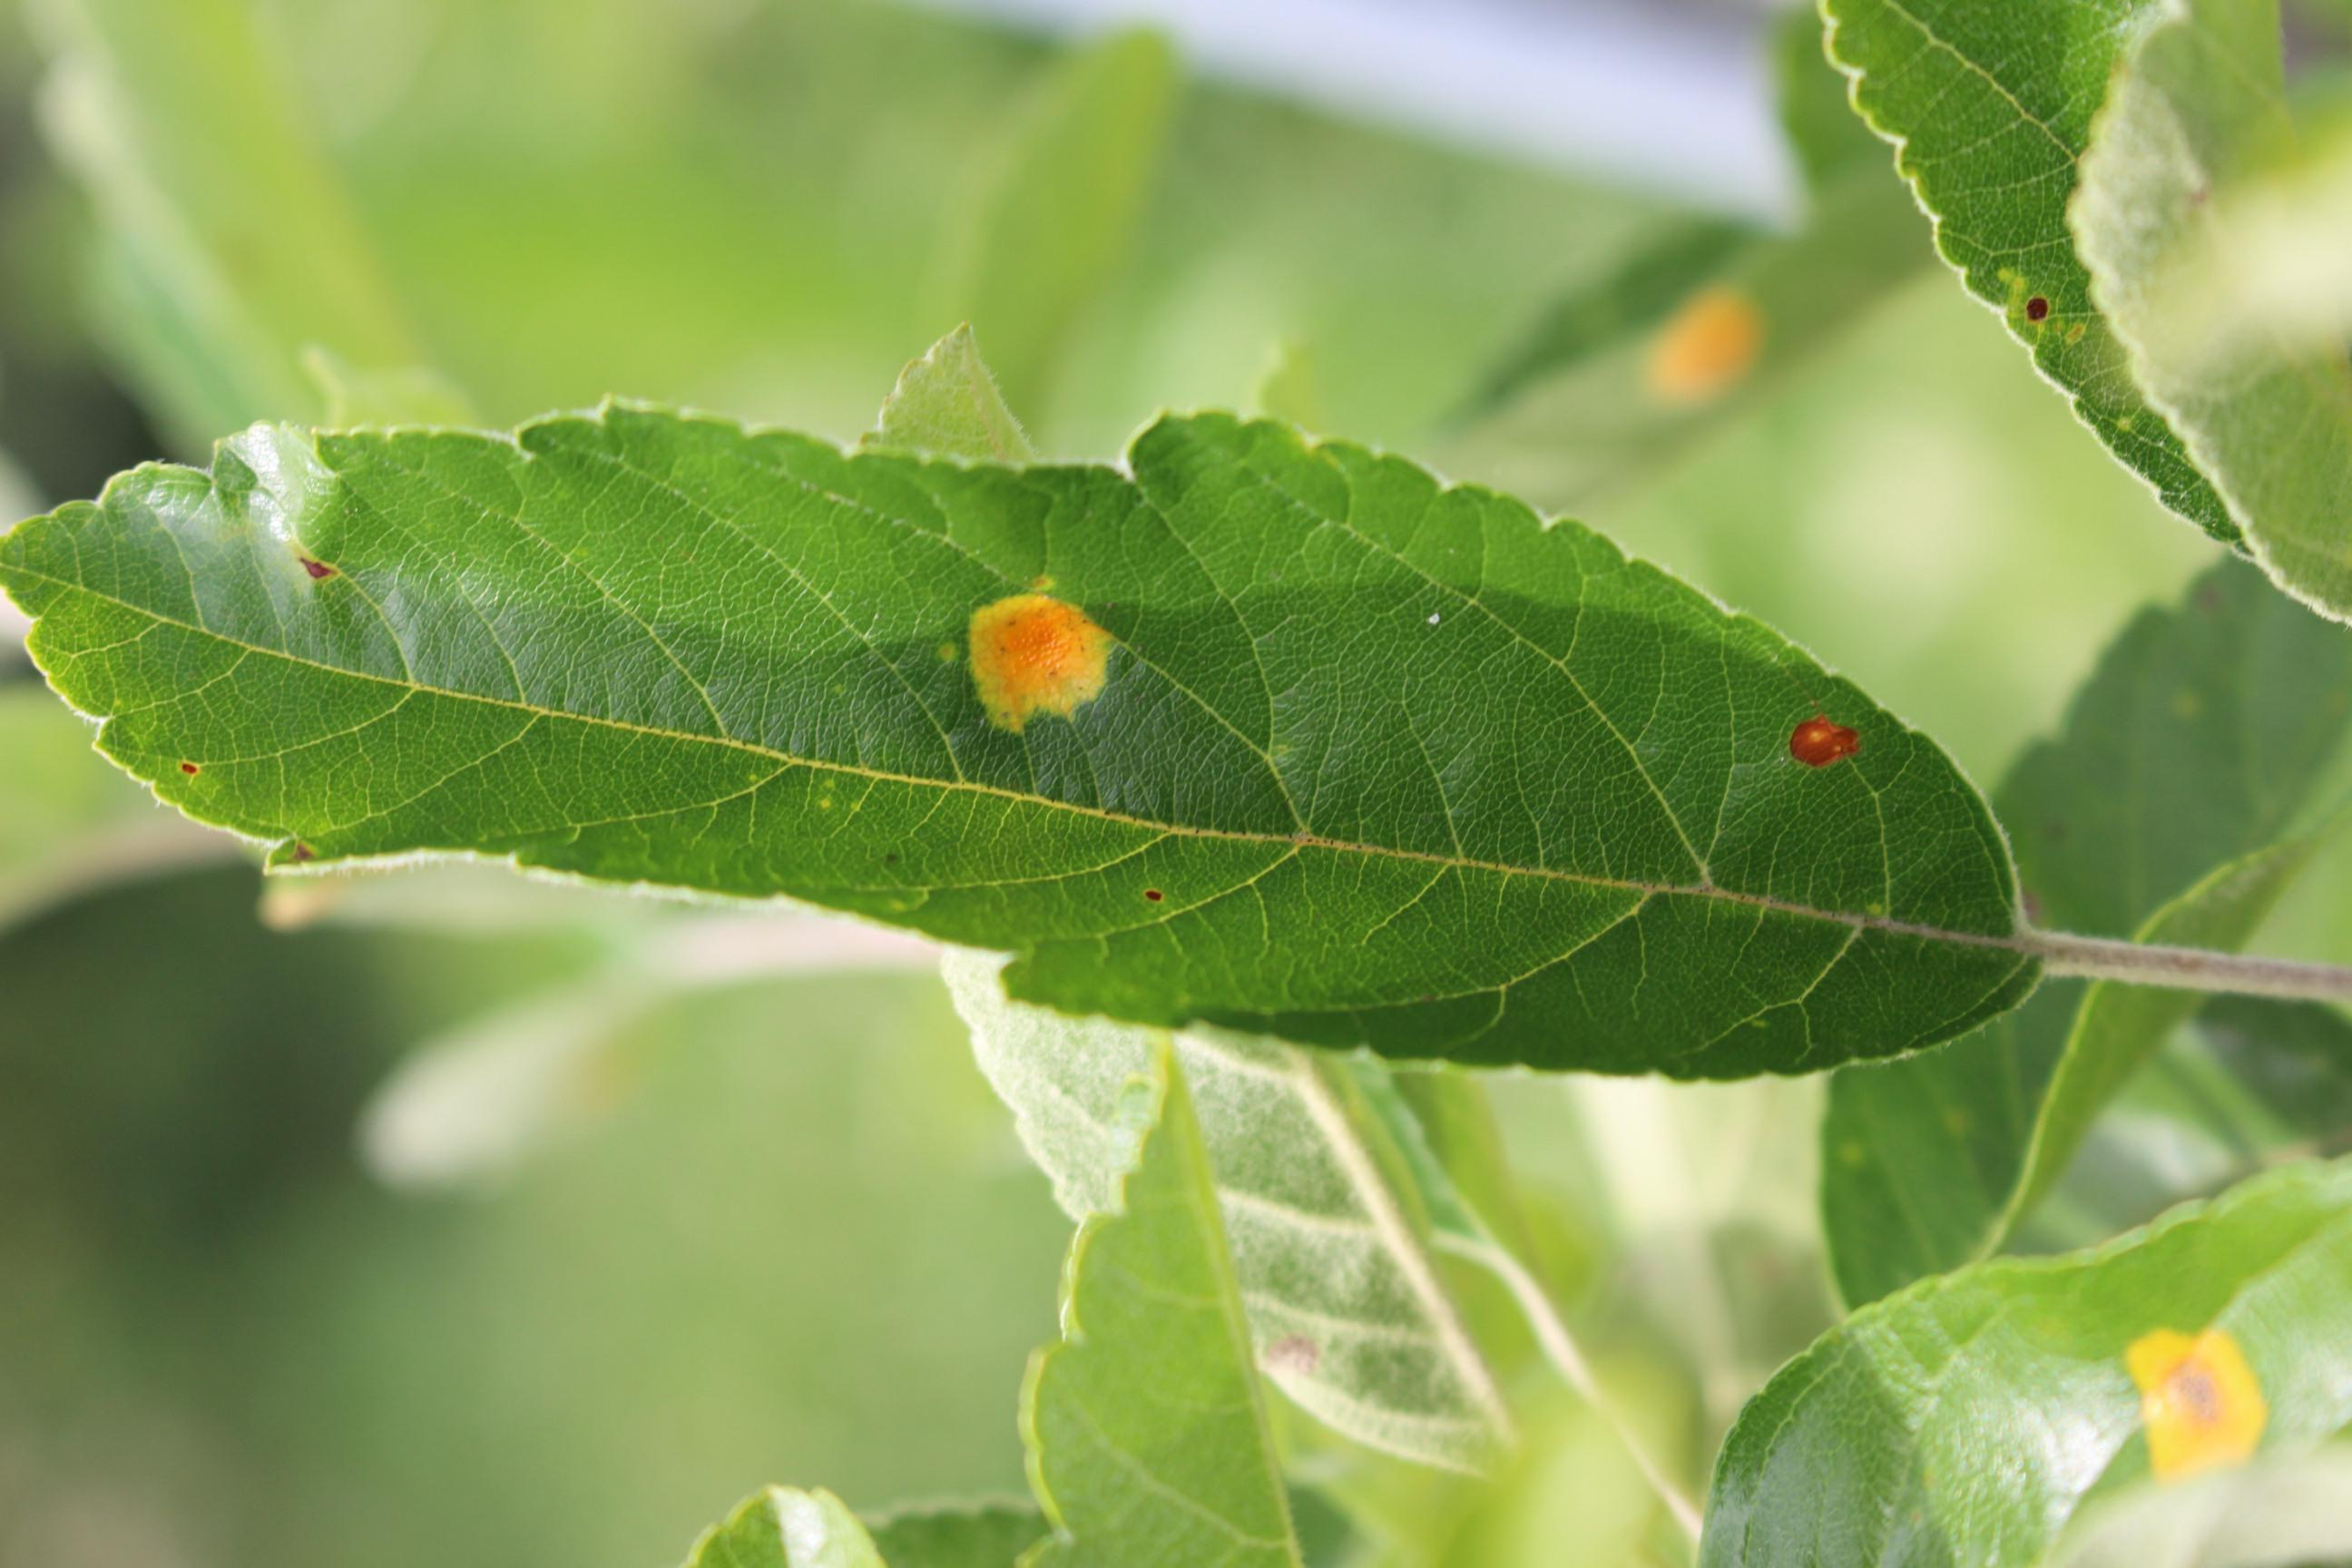

In [ ]:
# Show Rust plant image samples
folder_path = '/content/drive/MyDrive/crop/plant_dataset/Test/Test/Rust'
print("Rust Plant image:")
show_sample_images(folder_path)

Powdery PLant image:


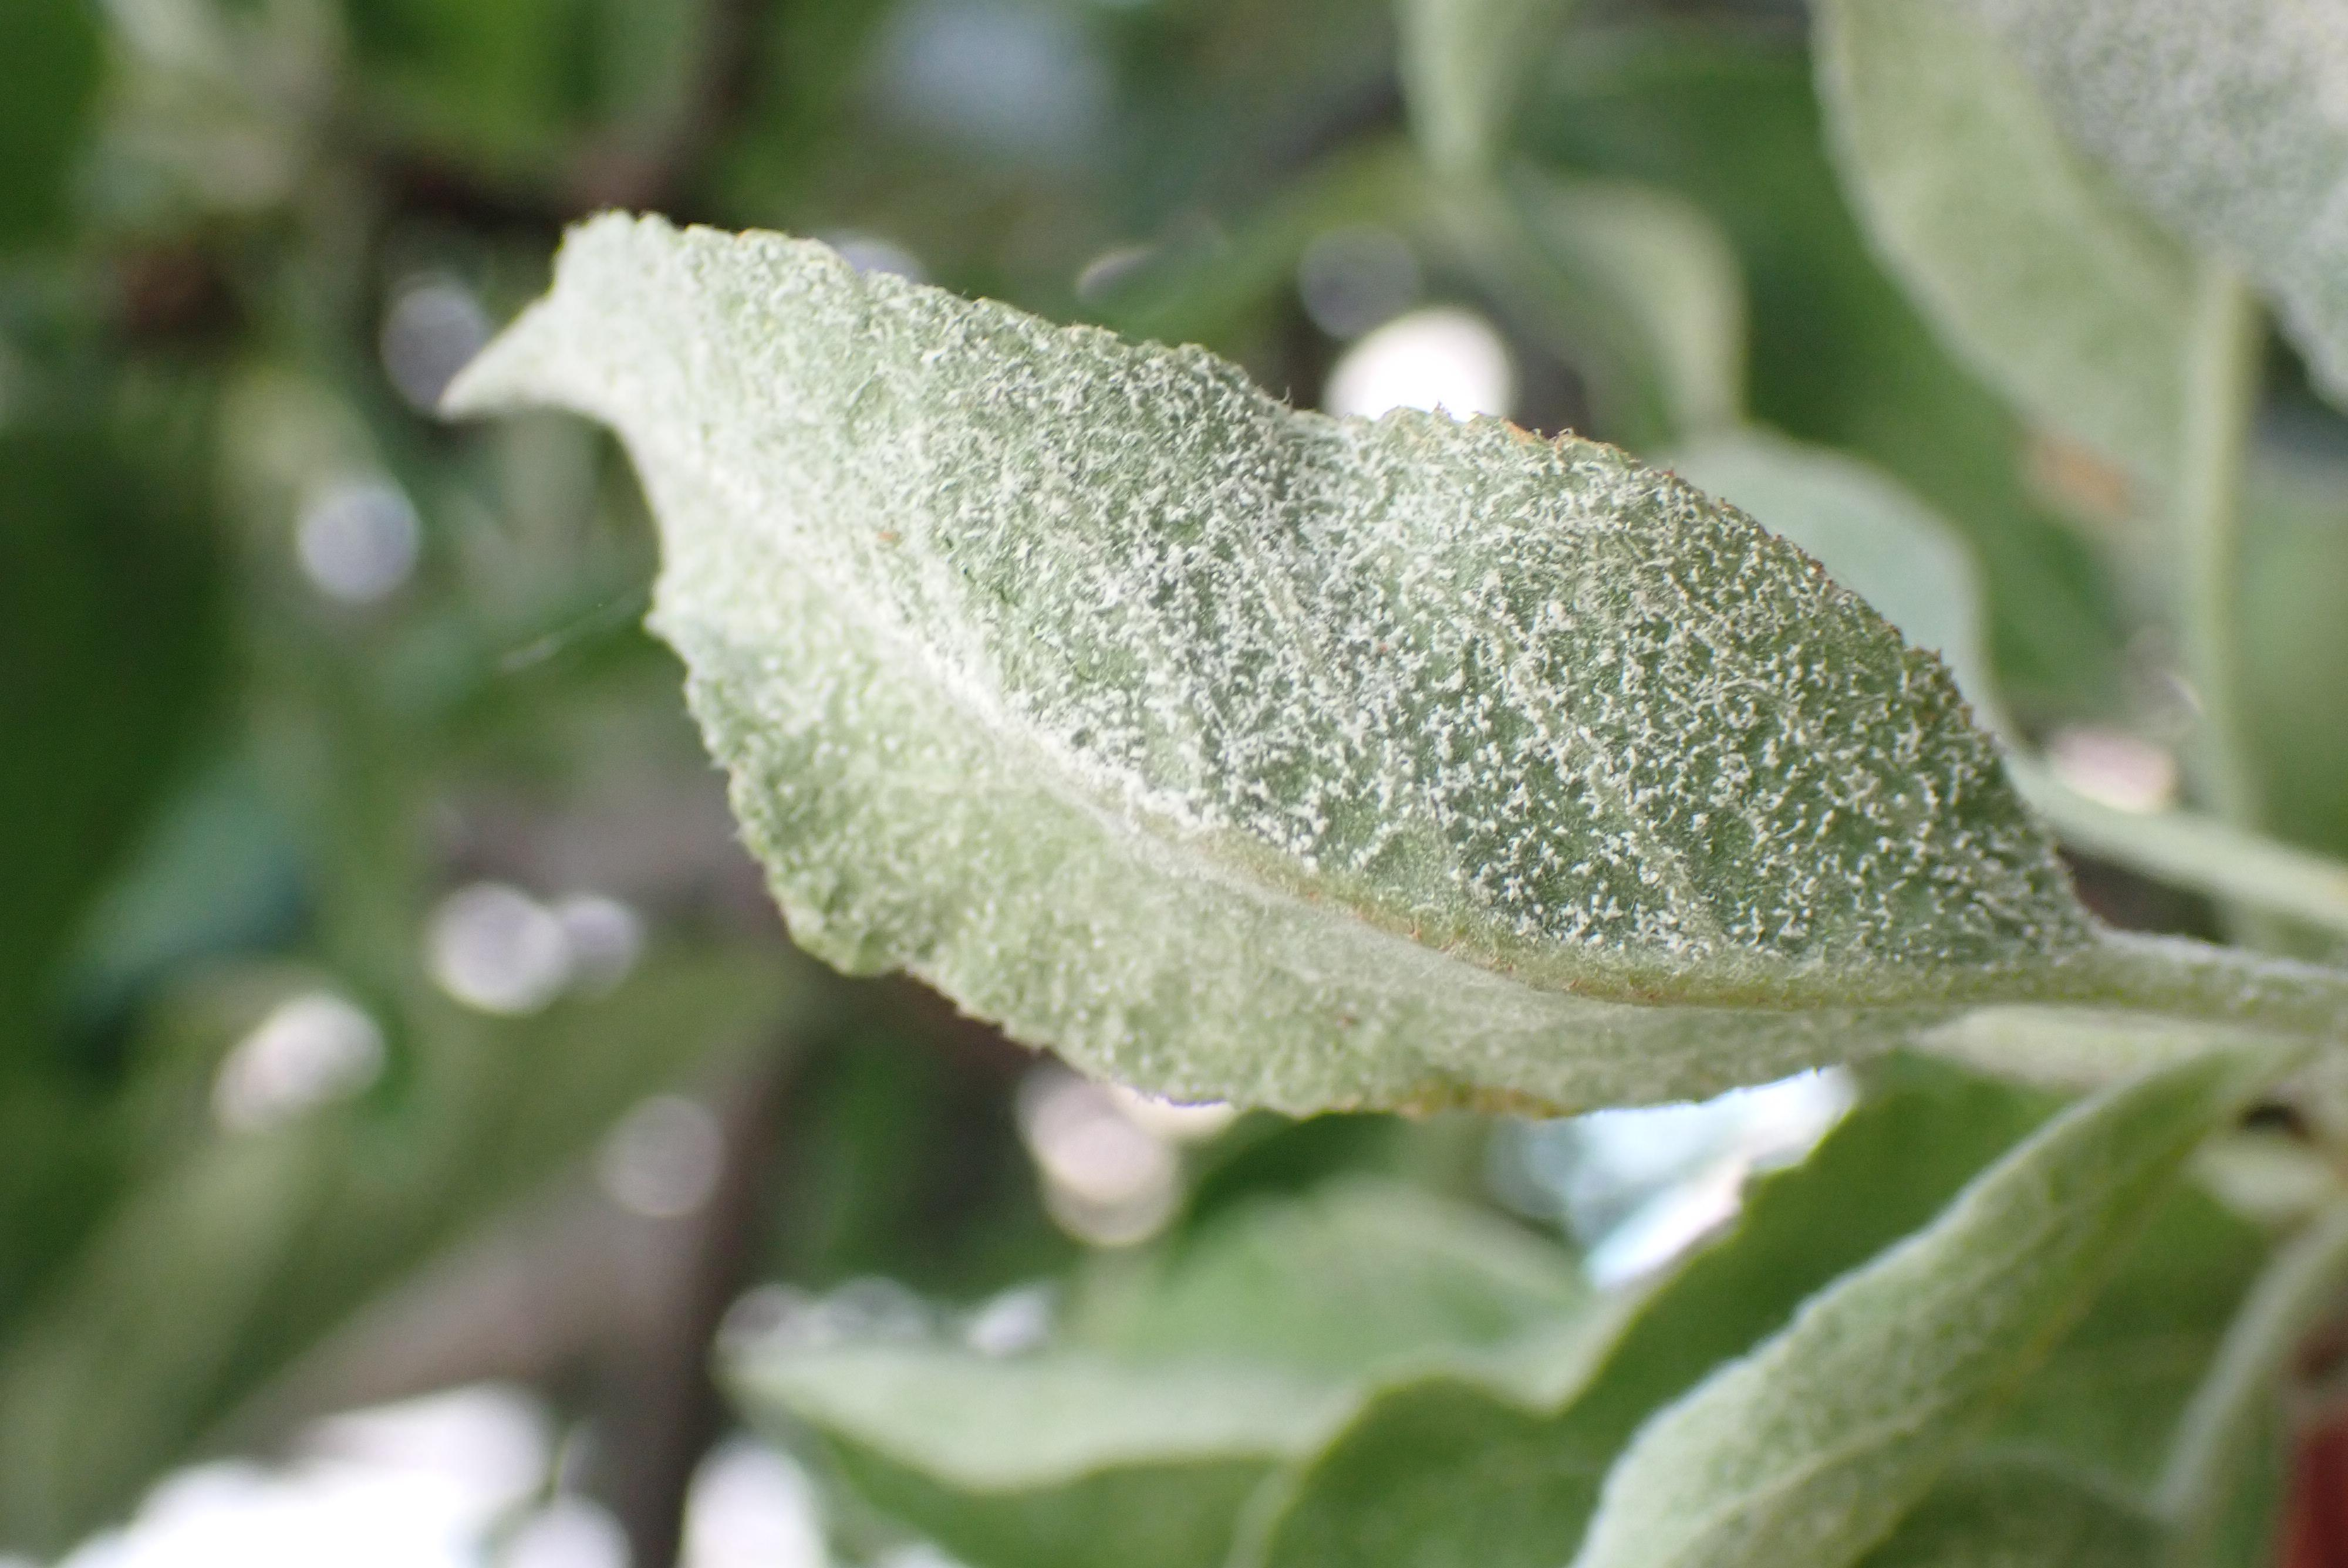

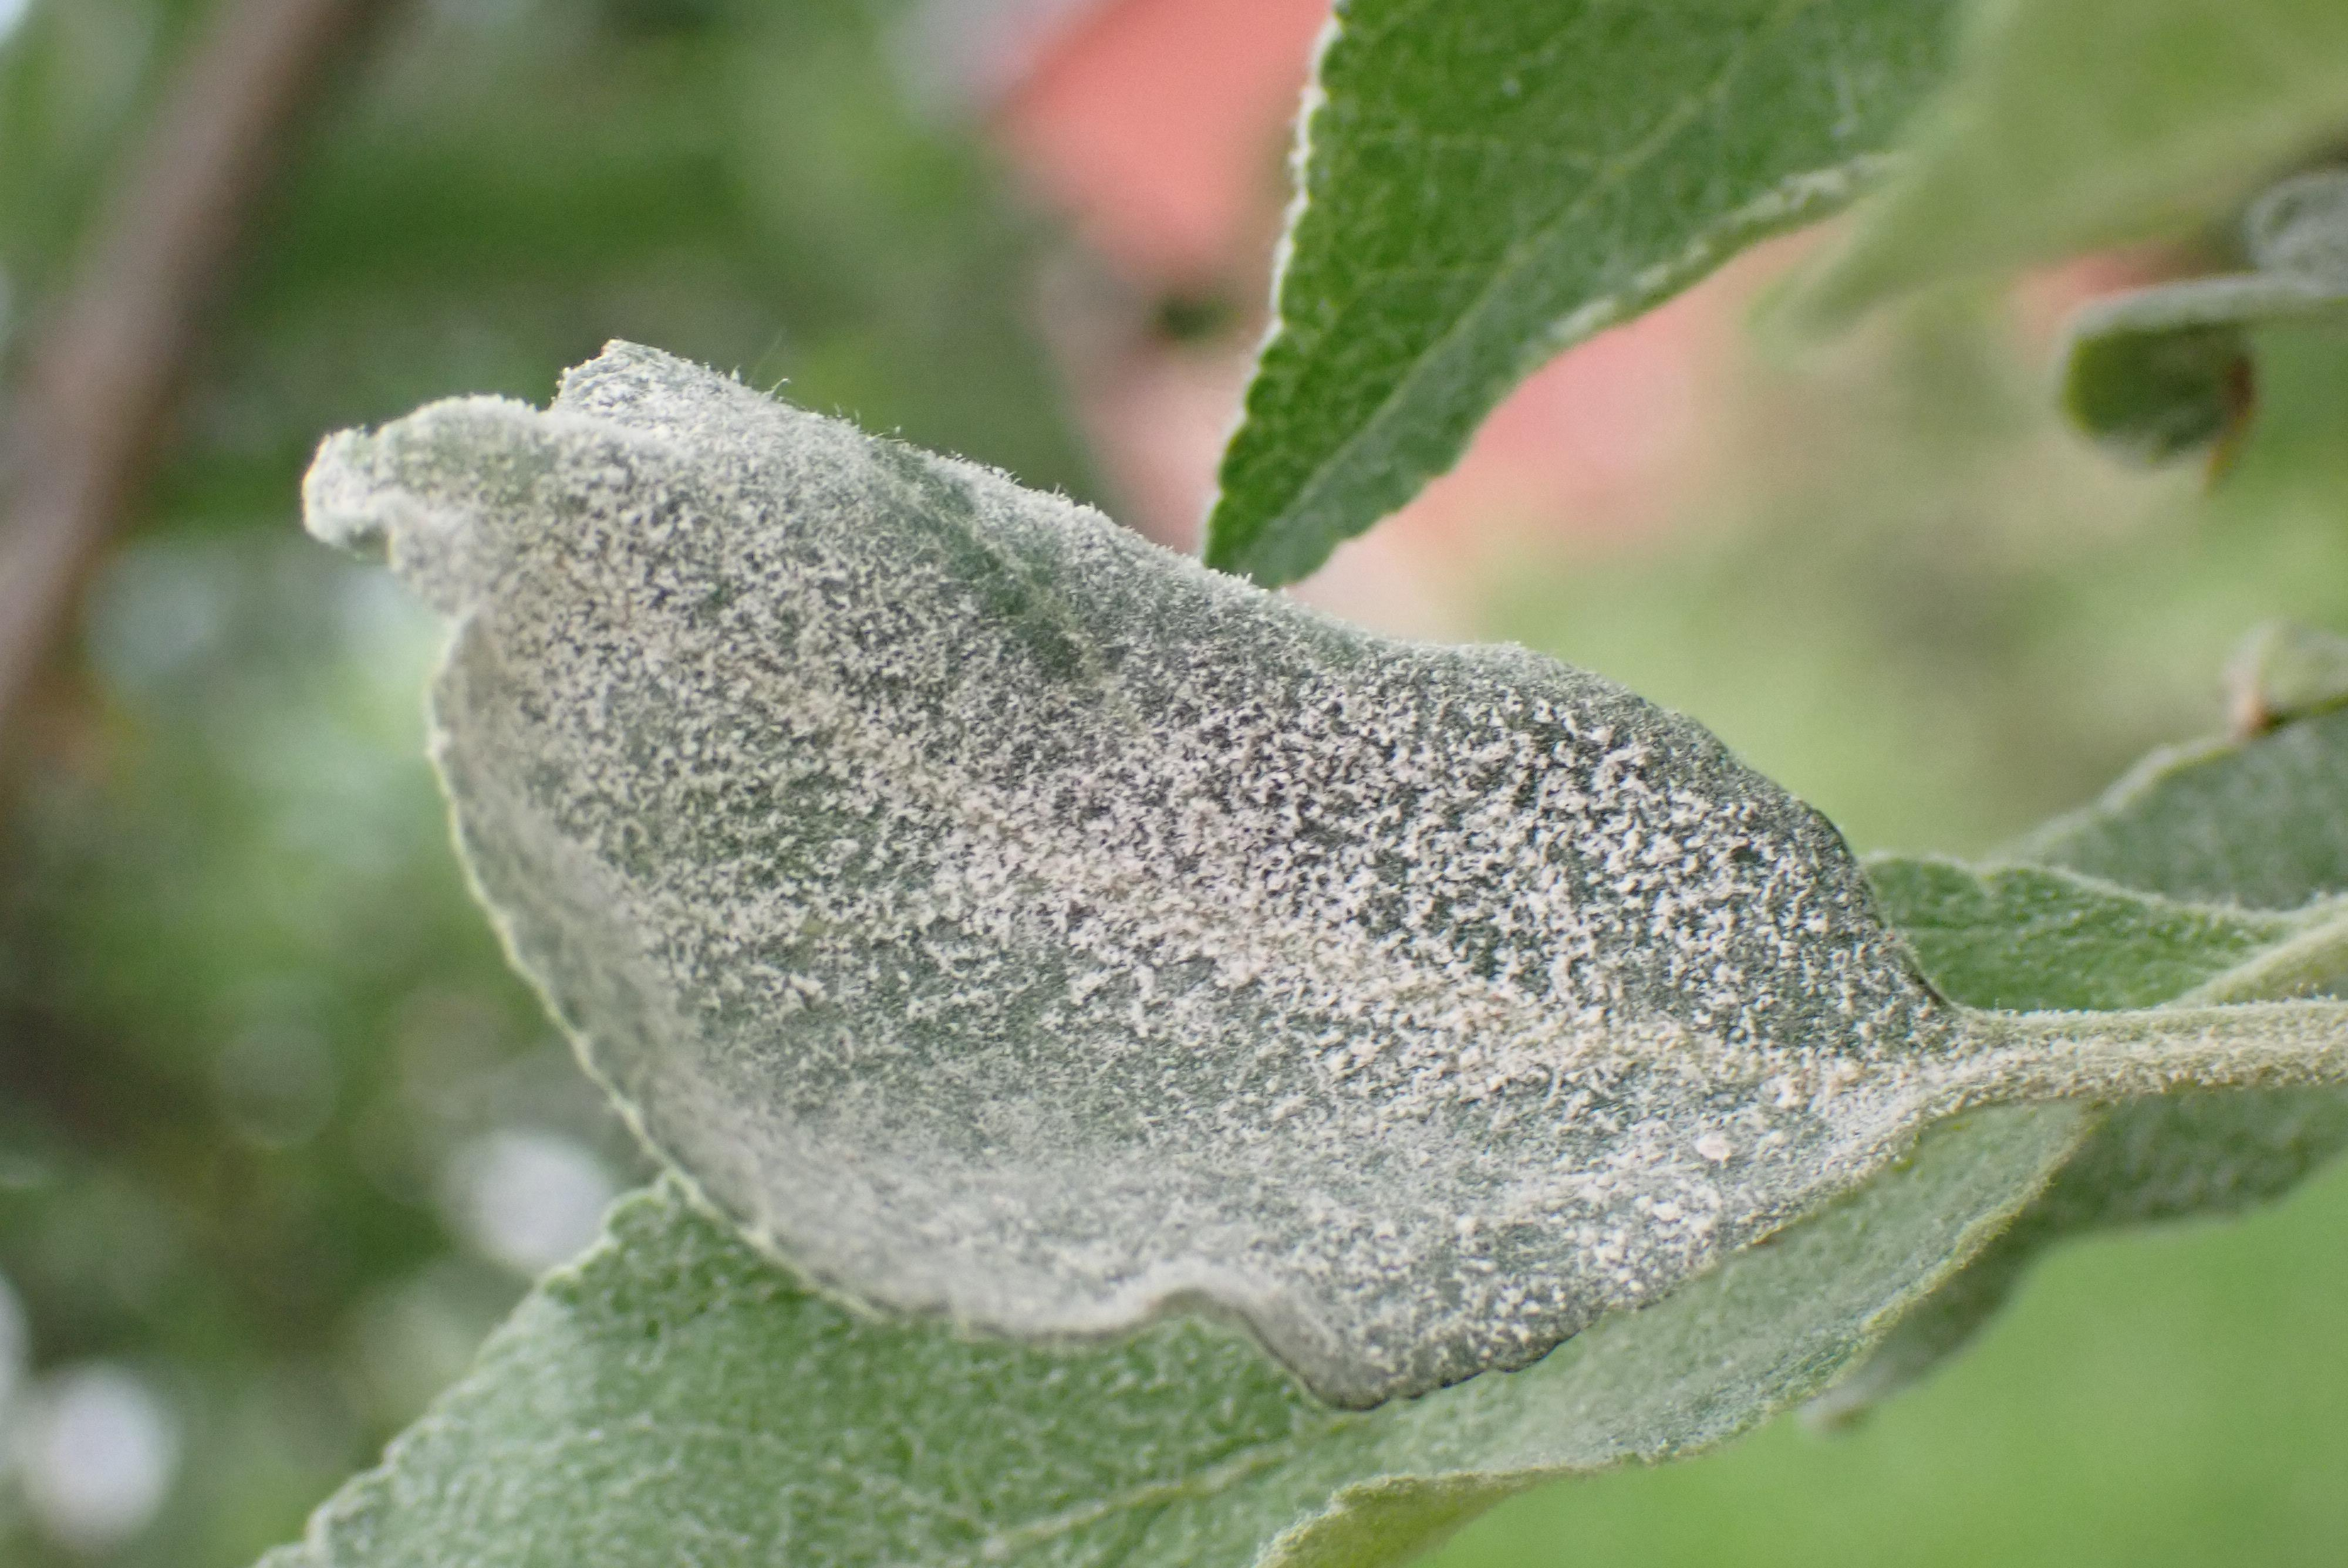

In [ ]:
# Show powdery plant image samples
folder_path = '/content/drive/MyDrive/crop/plant_dataset/Train/Train/Powdery'
print("Powdery PLant image:")
show_sample_images(folder_path)

In [ ]:
# Image augmentation for training and validation data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare training image batches
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/crop/plant_dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

# Prepare validation image batches
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/crop/plant_dataset/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:

# ---------------------- MODEL BUILDING ----------------------
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ---------------------- MODEL TRAINING ----------------------
# Train the model
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 508s 12s/step - accuracy: 0.3802 - loss: 3.0248 - val_accuracy: 0.6333 - val_loss: 0.8873
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.7134 - loss: 0.7226 - val_accuracy: 0.6667 - val_loss: 0.7717
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.8156 - loss: 0.4586 - val_accuracy: 0.8167 - val_loss: 0.4581
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 222s 5s/step - accuracy: 0.8859 - loss: 0.3136 - val_accuracy: 0.8167 - val_loss: 0.4696
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.9193 - loss: 0.2164 - val_accuracy: 0.8833 - val_loss: 0.5044


In [ ]:
# ---------------------- PLOTTING ----------------------
# Set Seaborn theme
sns.set_theme()
sns.set_context("poster")

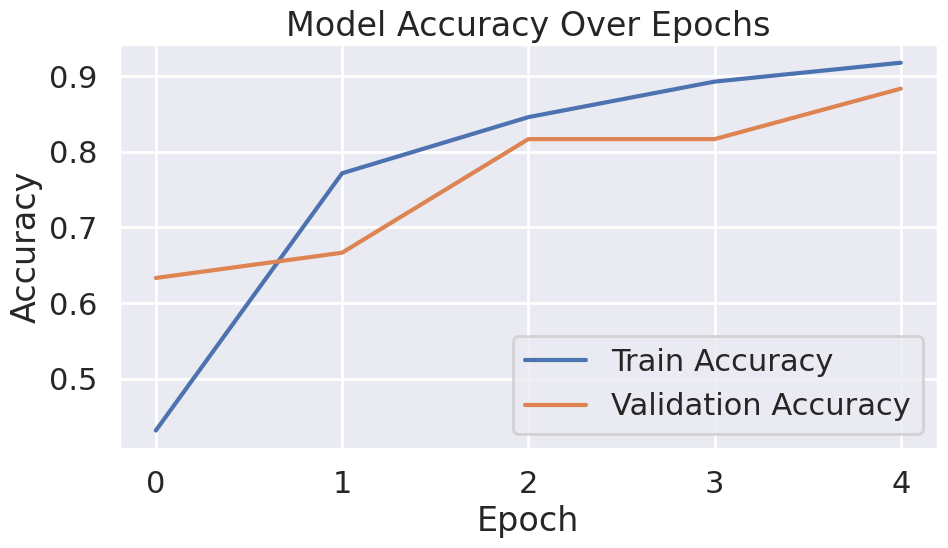

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


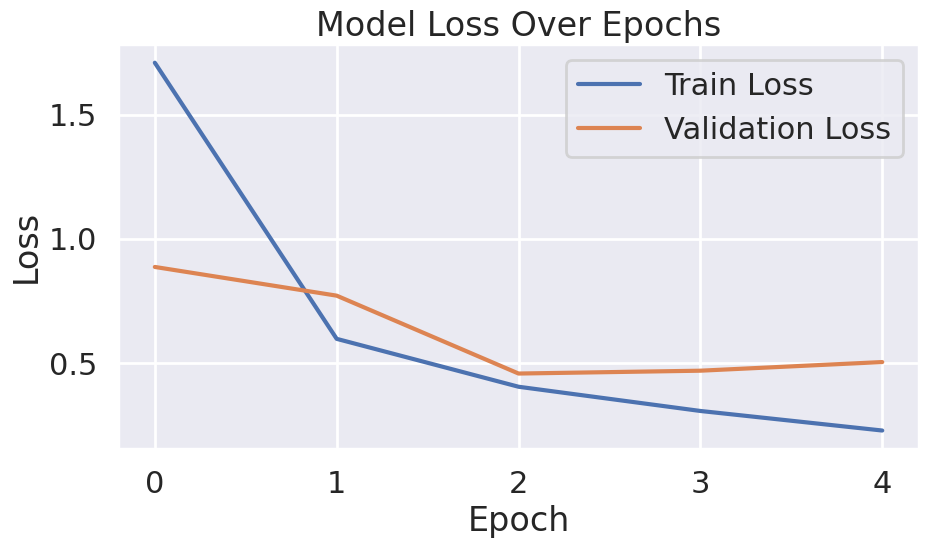

In [ ]:
# Plot training and validation loss

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Create test generator
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/crop/plant_dataset/Test/Test',
                                                      target_size=(225, 225),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      shuffle=False)  # Important for getting predictions in order
# Predict using the model
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Predictions on the test set completed.")
# You can now compare predicted_classes with true_classes or further process the predictions
# For example, print the first few predictions and true labels:
print("First 10 True Labels:", true_classes[:10])
print("First 10 Predicted Labels:", predicted_classes[:10])
print("First 10 True Labels:", true_classes[:-10])
print("First 10 Predicted Labels:", predicted_classes[:-10])
print("Corresponding Class Names for First 10 Predictions:", [class_labels[i] for i in predicted_classes[:10]])

Found 150 images belonging to 3 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step
Predictions on the test set completed.
First 10 True Labels: [0 0 0 0 0 0 0 0 0 0]
First 10 Predicted Labels: [0 0 0 0 2 0 0 0 0 0]
First 10 True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
First 10 Predicted Labels: [0 0 0 0 2 0 0 0 0 0 0 0 1 0 2 2 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2
 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2]
Corresponding Class Names for First 10 Predictions: ['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Rust', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']


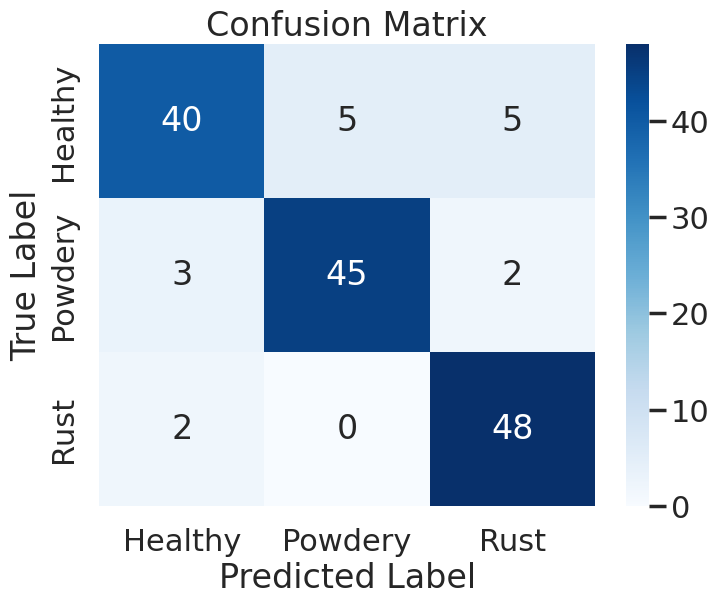

In [ ]:


# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy: 0.8867


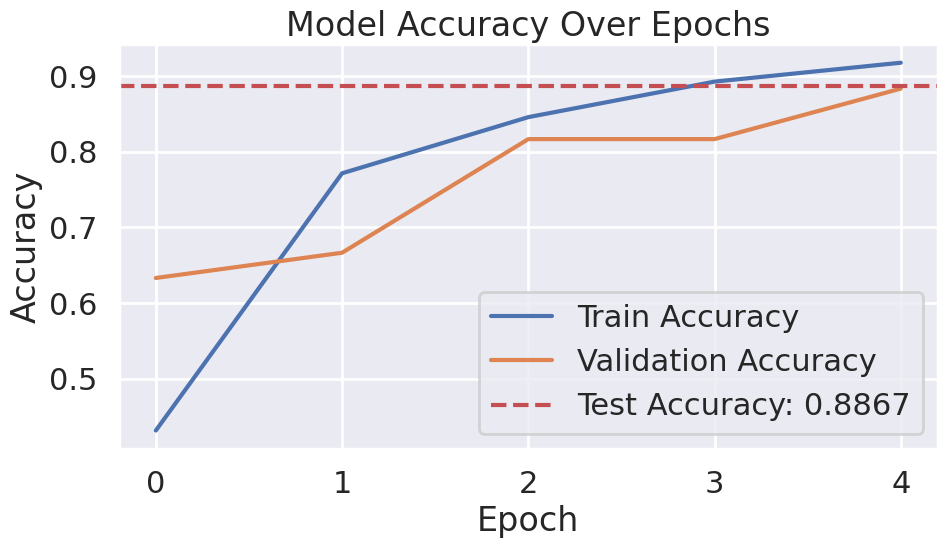

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Add the test accuracy to the plot
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')

plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/crop/plant_disease_model.keras')

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Preprocess a single image
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x
# Load and preprocess an image
x = preprocess_image('/content/drive/MyDrive/crop/plant_dataset/Test/Test/Powdery/80bc7d353e163e85.jpg')

In [ ]:
# Make prediction on the image
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


array([0.09807795, 0.89087397, 0.01104815], dtype=float32)

In [ ]:
# Get class labels from training generator
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
# Get the predicted label
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery
